### 딥-러닝 과정 MLP 

## Keras 모델 생성/학습 - 보스턴 집값 예측 모델

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/06/Regression-Tutorial-with-Keras-Deep-Learning-Library-in-Python.jpg)

* CRIM: per capita crime rate by town  
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town.
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per \$10,000
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000’s

## 딥러닝을 이용하여 문제 해결 해보기

In [214]:
# 1. 데이터 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [215]:
df= pd.read_csv('BostonHousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [217]:
-df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [218]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

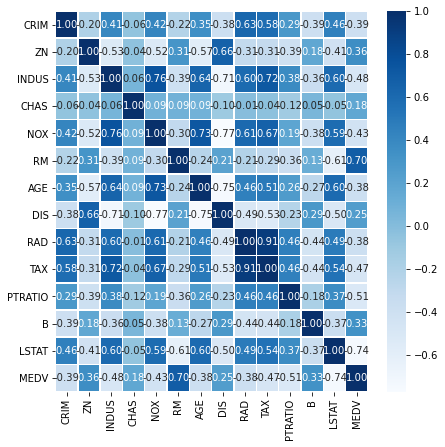

In [219]:
plt.figure(figsize=(7,7))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

TAX와 RAD 는 상관관계가 높아서 하나는 빼주기로하고 
describe에서 확인했을때, 0이 있던 컬럼을 빼주어 박스 플롯으로 시각화 하였는데

위에서 다시 확인한 결과, 'CHAS'는 0,1 카테고리형으로 나타나짐.



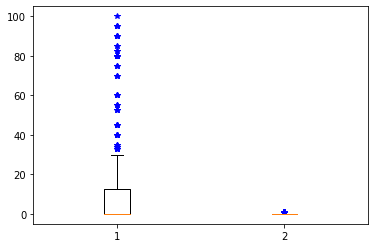

In [220]:

plt.rcParams['figure.figsize'] = [10, 6]

%matplotlib inline

fig, ax = plt.subplots()
ax.boxplot([df['ZN'], df['CHAS']],sym="b*")

plt.show()


In [221]:
#그래서 안쓰는 컬럼을 우선 하나 drop 해보자. 
df = df.drop('RAD', axis=1)
df

y = df[['MEDV']]
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [222]:
# 2. Data 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[:] = scaler.fit_transform(df[:])


In [223]:
# x,y 분류 
X = df.drop('MEDV', axis=1)


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=100)

X_val, X_test, y_val, y_test = train_test_split(X,y, test_size=0.5, random_state=100)

In [225]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [240]:
# 3. MLP 모델 생성
model = keras.Sequential()

model.add(layers.Dense(input_dim =12, units=128,kernel_regularizer = keras.regularizers.L2(0.1)))
model.add(layers.Activation('relu'))
#kernel_regularizer = keras.regularizers.L2(0.1)
# model.add(kernel_regularizer = keras.regularizers.L2(0.1))

model.add(layers.Dense(units=512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))  # 앞에있는 layer에 영향이 간다. 

model.add(layers.Dense(units=128))
model.add(layers.Activation('relu'))


model.add(layers.Dense(units=1))
model.add(layers.Activation('linear'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               1664      
_________________________________________________________________
activation_49 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               66048     
_________________________________________________________________
activation_50 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               65664     
_________________________________________________________________
activation_51 (Activation)   (None, 128)             

In [252]:
# 4. Compile - Optimizer, Loss function 설정
from keras.callbacks import ModelCheckpoint
adam= keras.optimizers.Adam(lr=0.1)
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mae'])

#modelcheckoutpoint 는, loss값이 가장 적은 좋은 곳을 저장해주는 기능 

model_path = 'keras_house_model.h5'
model_checkoutpoinr = ModelCheckpoint(filepath=model_path,
                                        monitor = 'val_loss',
                                        save_best_only=True
                                     )

In [256]:
# 5.학습시키기
from keras.callbacks import EarlyStopping    #학습 진행되는지 먼저 보고, 나중에 추가하는 것이 좋다
early_stopping = EarlyStopping(monitor='val_loss', # val_loss 는 default 값
                            patience=10 ) 

model_path = 'keras_house_model.h5'
model_checkoutpoinr = ModelCheckpoint(filepath=model_path,
                                        monitor = 'val_loss',
                                        save_best_only=True
                                     )


# val_loss가 올라갈때 참을성 10번 할당           
history= model.fit(X_train,y_train,
          validation_data = (X_val, y_val),  # 위에서 안하고, 바로 할 수도 있다. validation_split =0.1
          batch_size=32,
          epochs=1000,
          verbose=1, 
          callbacks= [early_stopping])         
          #verbose 는 0,1,2 의 값만 가지게 된다. 학습이 진행되는 걸 보고 싶르면
          #0으로 지정, 안 보고 싶다면 1, loss 값만 보고 싶다면 2
         

Epoch 1/1000
13/13 [==============================] - 1s 15ms/step - loss: 7.8028 - mae: 1.8603 - val_loss: 4.2059 - val_mae: 1.3118
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 6.1285 - mae: 1.6876 - val_loss: 5.0895 - val_mae: 1.6174
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 4.9287 - mae: 1.4959 - val_loss: 3.7507 - val_mae: 1.2286
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 4.7188 - mae: 1.4250 - val_loss: 3.7883 - val_mae: 1.2376
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 4.4931 - mae: 1.4024 - val_loss: 5.4758 - val_mae: 1.6925
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 6.4881 - mae: 1.7972 - val_loss: 3.5922 - val_mae: 1.1955
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 4.9671 - mae: 1.5295 - val_loss: 3.8831 - val_mae: 1.2639
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 5

In [257]:
# 6. Model Evaluate
train_result = model.evaluate(X_train, y_train)
test_result = model.evaluate(X_test, y_test)


8/8 [==============================] - 0s 1ms/step - loss: 6.6535 - mae: 1.6472


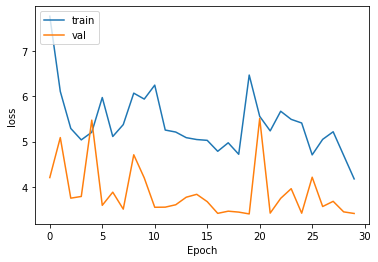

In [258]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [259]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.164122,0.893617,0.991301,0.131071


## 전통적인 머신러닝 방법으로 해결해보자. 

기본적인 회귀 모형으로는, 식 1개로 해결했다면
위의 딥러닝 방법으로는, active함수 포함 및 여러가지의 모델들이 복잡하게 연결되어 있고, 앙상블의 역할을 톡톡히 한다. 

In [232]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [233]:
from sklearn.linear_model import LinearRegression

linear_model= LinearRegression()   # y= wx +b / bias,(기본값이 True : bias의 영향을 미치게 한다. ) intercept
# linear_model =  LinearRegression(intercept = False)  -> 영향을 없애준다. 
linear_model.fit(X_train, y_train)

LinearRegression()

In [234]:
from sklearn.tree import DecisionTreeRegressor
tree_model =DecisionTreeRegressor().fit(X_train, y_train)

In [235]:
y_pred = linear_model.predict(X_test)
print(y_pred)
print(y_test)

[[35.00573237]
 [30.63752223]
 [23.09524336]
 [18.42897518]
 [20.43445132]
 [26.38560695]
 [27.49488295]
 [23.35512516]
 [23.63168532]
 [19.06036939]
 [25.87351949]
 [16.26189116]
 [21.44412465]
 [18.07683807]
 [40.65698739]
 [21.87416794]
 [29.10812808]
 [19.14994259]
 [33.06041099]
 [42.35895234]
 [34.35669146]
 [20.00003253]
 [21.52139408]
 [17.2861887 ]
 [13.40113558]
 [11.92070552]
 [27.18994122]
 [19.29930714]
 [17.99446851]
 [20.90391919]
 [16.81131972]
 [23.51300469]
 [38.87033427]
 [24.71614854]
 [30.95165816]
 [28.4182983 ]
 [17.05269519]
 [15.72926529]
 [15.57407708]
 [23.09054265]
 [22.45915197]
 [24.4578854 ]
 [13.23512651]
 [23.41707634]
 [32.95928283]
 [26.06904408]
 [18.24294549]
 [16.00553946]
 [16.58706309]
 [12.37659985]
 [22.37863283]
 [21.40611105]
 [22.78327305]
 [23.87833688]
 [11.13212896]
 [15.20952768]
 [24.70594178]
 [34.11002559]
 [10.0468692 ]
 [21.71963855]
 [17.19408581]
 [19.4147824 ]
 [18.17843027]
 [30.97683695]
 [20.16457628]
 [25.11195064]
 [17.08917

In [236]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae_l= mean_absolute_error(y_test, y_pred)
sme_l = mean_squared_error(y_test, y_pred)
r2_l = r2_score(y_test, y_pred)

print('mae =', mae_l)
print('msme =', sme_l)
print('r2 =', r2_l)

mae = 3.4841400526446744
msme = 27.09208627320056
r2 = 0.6996870210322352
